In [1]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import time, os, psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyfpgrowth
import sys
import argparse

In [2]:
import pandas as pd

datContent = [i.strip().split() for i in open("D:/Ngoc_Anh_ne/DA_T5/Lab_4/mushroom.dat").readlines()]


In [3]:
#chuyen doi ma tran du lieu thanh nhi phan
te = TransactionEncoder()
te_arr = te.fit(datContent).transform(datContent)
df = pd.DataFrame(te_arr, columns=te.columns_)

df

,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
0,True,False,False,False,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,True,True,False,False,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
8122,True,True,False,False,True,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False


In [17]:
print('Thuat toan Apriori')

#danh sach minsupp
listminsup = [0.9, 0.85, 0.8, 0.7, 0.6]
listconf = [0.9, 0.85, 0.8, 0.7, 0.6]
#list_timecost = []
#list_memorycost = []
for val1 in listminsup:
    for val2 in listconf:
        # tim tap pho bien
        start_time = time.time() # bat dau tinh thoi gian chay
        frequent_itemsets = apriori(df, min_support=val1, use_colnames=True, low_memory=True)
                        
        end_time = time.time() # ket thuc thoi gian chay

        # Tinh thoi gian chay va tieu thu bo nho
        timecost = end_time - start_time
        memorycost = psutil.Process(os.getpid()).memory_info().rss / 1024 ** 2
        
        
 #       list_memorycost.append(memorycost)
 #       list_timecost.append(timecost)
        
      
        
  #      list_timecost       list_memorycost

Thuat toan Apriori


In [18]:
frequent_itemsets = frequent_itemsets
        
timecost
memorycost



211.50390625

In [15]:
res = association_rules(frequent_itemsets, metric="confidence", support_only=True, min_threshold=0.8)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(34),(36),NaN,NaN,0.812654,NaN,NaN,NaN,NaN,NaN
1,(36),(34),NaN,NaN,0.812654,NaN,NaN,NaN,NaN,NaN
2,(85),(34),NaN,NaN,0.974151,NaN,NaN,NaN,NaN,NaN
3,(34),(85),NaN,NaN,0.974151,NaN,NaN,NaN,NaN,NaN
4,(86),(34),NaN,NaN,0.973166,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
83,"(90, 34)","(85, 86)",NaN,NaN,0.897095,NaN,NaN,NaN,NaN,NaN
84,(85),"(90, 86, 34)",NaN,NaN,0.897095,NaN,NaN,NaN,NaN,NaN
85,(86),"(85, 90, 34)",NaN,NaN,0.897095,NaN,NaN,NaN,NaN,NaN
86,(90),"(85, 86, 34)",NaN,NaN,0.897095,NaN,NaN,NaN,NaN,NaN


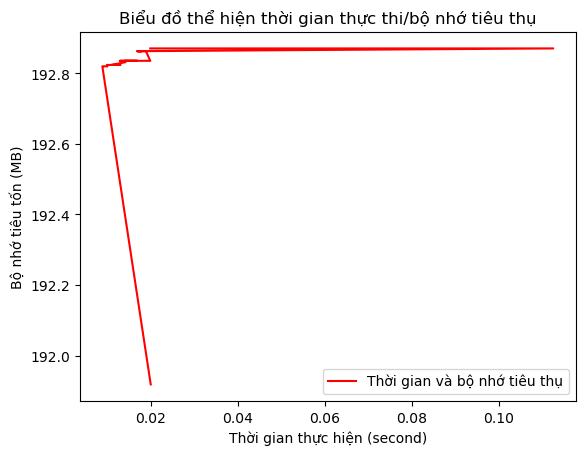

In [6]:
# ve do thi
plt.plot(list_timecost, list_memorycost, color='red', label='Thời gian và bộ nhớ tiêu thụ')
plt.xlabel('Thời gian thực hiện (second)')
plt.ylabel('Bộ nhớ tiêu tốn (MB)')
plt.title('Biểu đồ thể hiện thời gian thực thi/bộ nhớ tiêu thụ')
plt.legend()
plt.show()